# Assignment 6: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [3]:
len(df.index)

701266

How many North Atlantic hurricanes are in this dataset?

In [4]:
len(df[df.BASIN == 'NA'])

123503

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [5]:
df.BASIN.unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [6]:
df.SUBBASIN.unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [7]:
df.NATURE.unique()

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [8]:
df.rename(columns={'WMO_WIND': 'WIND', 'WMO_PRES': 'PRES'}, inplace=True)
df.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON', 'WIND', 'PRES'],
      dtype='object')

### 3) Get the 10 largest rows in the dataset by `WIND`

In [9]:
df.nlargest(10, ['WIND'])

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
665303,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
665301,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
665305,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
426786,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
481224,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
551609,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
604896,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [10]:
df.groupby('SID').WIND.max().nlargest(10)

SID
2015293N13266    185.0
1980214N11330    165.0
1935241N23291    160.0
1988253N12306    160.0
1997253N12255    160.0
2005289N18282    160.0
2019236N10314    160.0
1998295N12284    155.0
2005261N21290    155.0
2009288N07267    155.0
Name: WIND, dtype: float64

### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

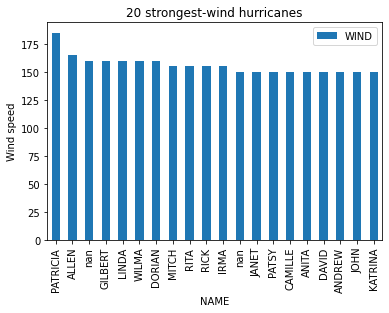

In [11]:
df.groupby('SID').max().nlargest(20,['WIND']).plot(kind='bar', x='NAME', y='WIND', ylabel = 'Wind speed', title = '20 strongest-wind hurricanes');

### 6) Plot the count of all datapoints by Basin

as a bar chart

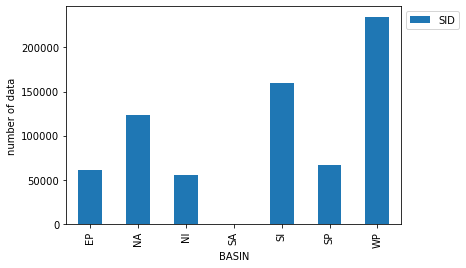

In [12]:
df.groupby('BASIN').SID.count().plot(kind='bar', ylabel = 'number of data').legend(bbox_to_anchor=(1.0, 1.0));

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

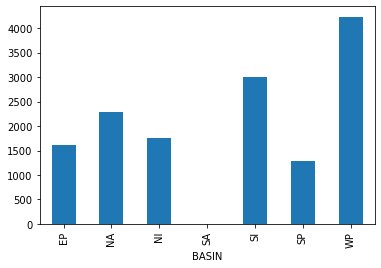

In [13]:
df.groupby('BASIN').SID.nunique().plot(kind='bar');

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

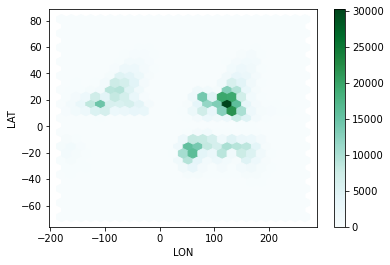

In [14]:
df.plot('LON', 'LAT', kind = 'hexbin', gridsize=25, xlabel = 'LON', sharex=False);

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [15]:
gb_katrina = df.groupby('NAME').get_group('KATRINA')
gb_katrina

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
332138,1967242N18253,1967,85,EP,MM,KATRINA,1967-08-30 00:00:00,TS,17.8000,-107.2000,45.0,NaN
332139,1967242N18253,1967,85,EP,MM,KATRINA,1967-08-30 03:00:00,TS,17.9859,-107.5960,NaN,NaN
332140,1967242N18253,1967,85,EP,MM,KATRINA,1967-08-30 06:00:00,TS,18.2120,-107.9900,45.0,NaN
332141,1967242N18253,1967,85,EP,MM,KATRINA,1967-08-30 09:00:00,TS,18.5131,-108.3860,NaN,NaN
332142,1967242N18253,1967,85,EP,MM,KATRINA,1967-08-30 12:00:00,TS,18.9000,-108.8000,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
602954,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
602955,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
602956,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
602957,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

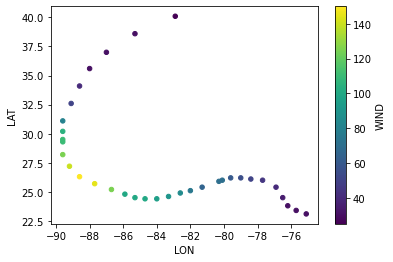

In [16]:
gb_katrina.groupby('SID').get_group('2005236N23285').plot('LON', 'LAT', kind = 'scatter', c = 'WIND', xlabel = 'LON', cmap ='viridis', sharex=False);

### 10) Make time the index on your dataframe

In [17]:
df_time = df.set_index('ISO_TIME')
df_time.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

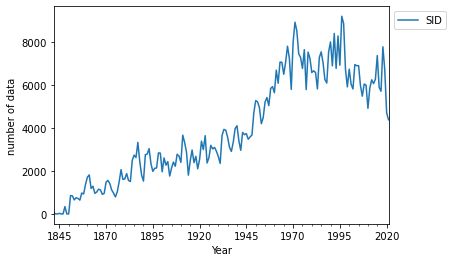

In [18]:
df_time.resample('Y').SID.count().plot(xlabel = 'Year', ylabel = 'number of data').legend(bbox_to_anchor=(1.0, 1.0));

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

/tmp/ipykernel_502/1099309563.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_NA = df_time.groupby('BASIN').get_group('NA').loc['2005-01-01':'2005-12-31'].groupby('SID')


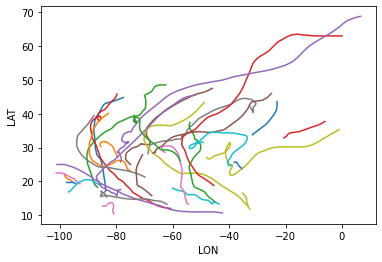

In [19]:
fig, ax = plt.subplots()
df_NA = df_time.groupby('BASIN').get_group('NA').loc['2005-01-01':'2005-12-31'].groupby('SID')
for key, group in df_NA:
    group.plot(x = 'LON', y = 'LAT', ylabel = 'LAT', ax=ax, legend=None)

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [20]:
df_NA_filtered = df_time.groupby('BASIN').get_group('NA').loc['1970-01-01':]
df_NA_filtered.head()

/tmp/ipykernel_502/1687462589.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_NA_filtered = df_time.groupby('BASIN').get_group('NA').loc['1970-01-01':]


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.500,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.575,-79.0676,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.700,-79.2000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.900,-79.4349,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.100,-79.7000,25.0,NaN


### 14) Plot the number of datapoints per day from this filtered dataframe


Make sure you figure is big enough to actually see the plot

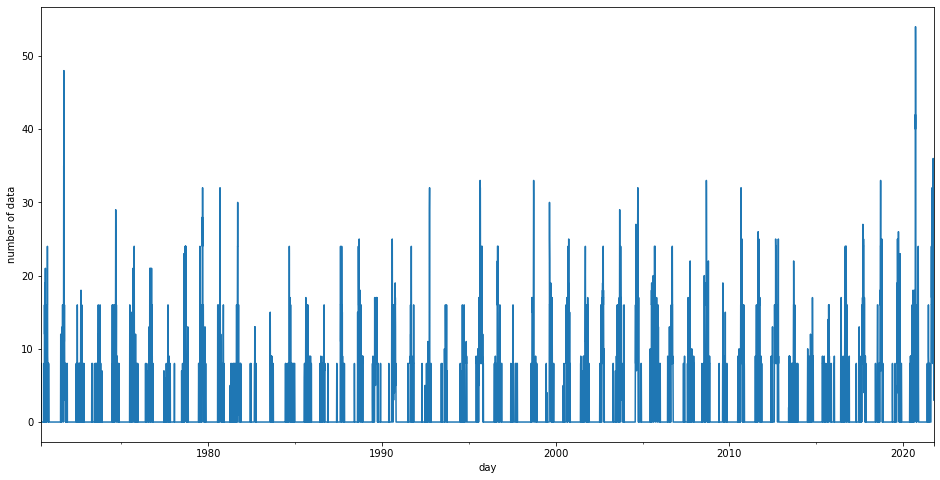

In [21]:
df_NA_filtered.resample('D').SID.count().plot(figsize = (16,8), ylabel = 'number of data', xlabel = 'day');

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

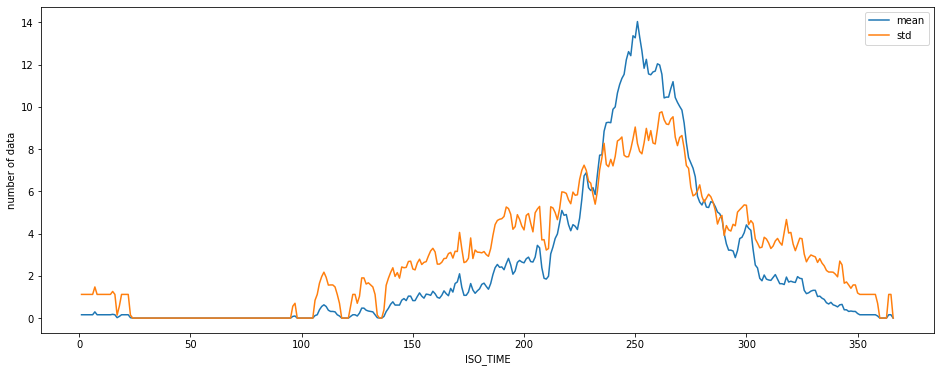

In [22]:
daily_clim = df_NA_filtered.resample('D').SID.count()

fig, ax = plt.subplots(figsize = (16,6))
daily_clim.groupby(daily_clim.index.dayofyear).mean().plot(ax=ax, ylabel='number of data', legend = 'right', label ='mean')
daily_clim.groupby(daily_clim.index.dayofyear).std().plot(ax=ax, legend = 'right', label = 'std');

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

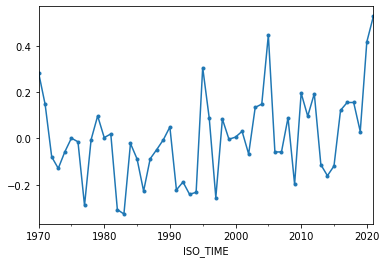

In [23]:
def standardize(x):
    return (x - x.mean())/x.std()

daily_clim.transform(standardize).resample('Y').mean().plot(style='.-');

Which years stand out as having anomalous hurricane activity?

In [24]:
daily_clim.transform(standardize).resample('Y').mean().nlargest(4)

ISO_TIME
2021-12-31    0.527830
2005-12-31    0.447060
2020-12-31    0.417161
1995-12-31    0.306492
Name: SID, dtype: float64

1995, 2005, 2020, 2021